In [ ]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/econ4130


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/econ4130


In [ ]:
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
  
  with open('{}.pkl'.format(fname),'rb') as pickle_file:
      dataframe=pickle.load(pickle_file)
      return dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train=pload('X_train_minmax3')
X_test=pload('X_test_minmax3')
Y_trainT=pload('Y_trainT')
Y_testT=pload('Y_testT')
Y_name=['3M','2Y','5Y','10Y','30Y']
X_selected=pload('X_selected2_3')

In [ ]:
#ols linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
ols={}
y_predict_ols={}
mse_ols={}
score_ols={}
for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  ols[target]= LinearRegression()
  ols[target].fit(X_train,y)
  print(target,' fitted')
  score_ols[target]=ols[target].score(X_train,y)
  y_test=Y_testT[i]
  y_predict_ols[target]=ols[target].predict(X_test)
  mse_ols[target]=mean_squared_error(y_test,y_predict_ols[target])
  

print(mse_ols)

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 160.5092918775281, '2Y': 39.02990053490515, '5Y': 13.917118012365478, '10Y': 9.162832080059742, '30Y': 16.304229331901947}


In [ ]:
#ols linear regression after selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
ols1={}
y_predict_ols1={}
mse_ols1={}
score_ols1={}
for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  ols1[target]= LinearRegression()
  ols1[target].fit(X_selected[i][0],y)
  print(target,' fitted')
  score_ols1[target]=ols1[target].score(X_selected[i][0],y)
  y_test=Y_testT[i]
  y_predict_ols1[target]=ols1[target].predict(X_selected[i][1])
  mse_ols1[target]=mean_squared_error(y_test,y_predict_ols1[target])
  

print(mse_ols1)

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 0.00071099641240085, '2Y': 0.0012218192687407246, '5Y': 0.002341671283233978, '10Y': 0.0027357852011851446, '30Y': 0.002278823653787646}


Ridge Rough Gridsearch

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge,Lasso 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error

mse_score = make_scorer(mean_squared_error, greater_is_better = False)
d=np.linspace(1,60,500)
param_grid = {0:{'alpha':[10,100,1000,5000]},1:{'alpha':d,},2:{'alpha':d,},3:{'alpha':d,},4:{'alpha':d,}}
ridge = Ridge(random_state = 1125,max_iter=5000)
tscv = TimeSeriesSplit(n_splits=3)
gscv_ridge={}
fitted_ridge={}
best_model_ridge={}
y_predict_ridge={}
mse_ridge={}
score_ridge={}

for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  gscv_ridge[target] = GridSearchCV(ridge,param_grid[i],scoring = mse_score, cv=tscv)
  fitted_ridge[target] = gscv_ridge[target].fit(X_train,y)
  print(target,' fitted')
  best_model_ridge[target] = fitted_ridge[target].best_estimator_
  score_ridge[target]=best_model_ridge[target].score(X_train,y)
  y_test=Y_testT[i]
  y_predict_ridge[target]=best_model_ridge[target].predict(X_test)
  mse_ridge[target]=mean_squared_error(y_test,y_predict_ridge[target])
  
print(mse_ridge) 
print(best_model_ridge)  

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 0.3312399369932109, '2Y': 0.0017504357404283647, '5Y': 0.008144490974259351, '10Y': 0.0057723086452758105, '30Y': 0.0022784542864255053}
{'3M': Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '2Y': Ridge(alpha=5.02004008016032, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '5Y': Ridge(alpha=6.32064128256513, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '10Y': Ridge(alpha=4.6653306613226455, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '30Y': Ridge(alpha=5.729458917835671, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001)}


Ridge Refined Gridsearch

In [ ]:
#Ridge 
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge,Lasso 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error

mse_score = make_scorer(mean_squared_error, greater_is_better = False)
d={0:{'alpha':np.linspace(979,981,201)},1:{'alpha':np.linspace(4,6,201)},2:{'alpha':np.linspace(5,7,201)},3:{'alpha':np.linspace(4,6,201)},4:{'alpha':np.linspace(5,7,201)}}
param_grid1 = {'alpha':d}
ridge = Ridge(random_state = 1125,max_iter=5000)
tscv = TimeSeriesSplit(n_splits=3)
gscv_ridge={}
fitted_ridge={}
best_model_ridge={}
y_predict_ridge={}
mse_ridge={}
score_ridge={}

for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  gscv_ridge[target] = GridSearchCV(ridge,d[i],scoring = mse_score, cv=tscv)
  fitted_ridge[target] = gscv_ridge[target].fit(X_train,y)
  print(target,' fitted')
  best_model_ridge[target] = fitted_ridge[target].best_estimator_
  score_ridge[target]=best_model_ridge[target].score(X_train,y)
  y_test=Y_testT[i]
  y_predict_ridge[target]=best_model_ridge[target].predict(X_test)
  mse_ridge[target]=mean_squared_error(y_test,y_predict_ridge[target])
  
print(mse_ridge) 
print(best_model_ridge)  

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 0.33165868524373165, '2Y': 0.0017580802892118036, '5Y': 0.008180019019296521, '10Y': 0.0058285116297086305, '30Y': 0.00228174334976581}
{'3M': Ridge(alpha=979.05, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '2Y': Ridge(alpha=5.0600000000000005, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '5Y': Ridge(alpha=6.3, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '10Y': Ridge(alpha=4.62, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '30Y': Ridge(alpha=5.69, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001)}


In [ ]:
#Ridge after feature selection
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge,Lasso 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error

d_={0:{'alpha':np.linspace(10,100,901)},1:{'alpha':np.linspace(0.01,0.09,9)},2:{'alpha':np.linspace(0.11,0.19,9)},3:{'alpha':np.linspace(0.00001,0.00019,19)},4:{'alpha':np.linspace(0.01,0.06,6)}}

mse_score = make_scorer(mean_squared_error, greater_is_better = False)
ridge = Ridge(random_state = 1125,max_iter=5000)
tscv = TimeSeriesSplit(n_splits=3)
gscv_ridge1={}
fitted_ridge1={}
best_model_ridge1={}
y_predict_ridge1={}
mse_ridge1={}
score_ridge1={}

for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  gscv_ridge1[target] = GridSearchCV(ridge,d_[i],scoring = mse_score, cv=tscv)
  fitted_ridge1[target] = gscv_ridge1[target].fit(X_selected[i][0],y)
  print(target,' fitted')
  best_model_ridge1[target] = fitted_ridge1[target].best_estimator_
  
  score_ridge1[target]=best_model_ridge1[target].score(X_selected[i][0],y)
  y_test=Y_testT[i]
  y_predict_ridge1[target]=best_model_ridge1[target].predict(X_selected[i][1])
  mse_ridge1[target]=mean_squared_error(y_test,y_predict_ridge1[target])
  
print(mse_ridge1)  
print(best_model_ridge1) 

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 0.06454865665853082, '2Y': 0.000986212045771618, '5Y': 0.0033237610203890183, '10Y': 0.002718999181111033, '30Y': 0.002326838692075483}
{'3M': Ridge(alpha=31.53153153153153, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '2Y': Ridge(alpha=0.06999999999999999, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '5Y': Ridge(alpha=0.14, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '10Y': Ridge(alpha=6e-05, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001), '30Y': Ridge(alpha=0.0225, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=1125, solver='auto', tol=0.001)}


In [ ]:
#Lasso
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge,Lasso 

from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error

mse_score = make_scorer(mean_squared_error, greater_is_better = False)
d2={0:{'alpha': np.linspace(0.00130,0.00190,61)},1:{'alpha': np.linspace(0.00040,0.00060,21)},2:{'alpha': np.linspace(0.00020,0.00040,21)},3:{'alpha': np.linspace(0.00010,0.00030,21)},4:{'alpha': np.linspace(0.00040,0.00060,21)}}
param_grid2 = {'alpha':d2}
lasso = Lasso(random_state = 1125,max_iter=10000)
tscv = TimeSeriesSplit(n_splits=3)
gscv_lasso={}
fitted_lasso={}
best_model_lasso={}
y_predict_lasso={}
mse_lasso={}
score_lasso={}

for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  gscv_lasso[target] = GridSearchCV(lasso,d2[i],scoring = mse_score, cv=tscv)
  fitted_lasso[target] = gscv_lasso[target].fit(X_train,y)
  print(target,' fitted')
  best_model_lasso[target] = fitted_lasso[target].best_estimator_
  score_lasso[target]=best_model_lasso[target].score(X_train,y)
  y_test=Y_testT[i]
  y_predict_lasso[target]=best_model_lasso[target].predict(X_test)
  mse_lasso[target]=mean_squared_error(y_test,y_predict_lasso[target])
  
print(mse_lasso) 
print(best_model_lasso) 

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 0.00042505771050153993, '2Y': 0.0009597082121994209, '5Y': 0.0018060534497474057, '10Y': 0.00258068356176075, '30Y': 0.002270013016495608}
{'3M': Lasso(alpha=0.0017, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1125,
      selection='cyclic', tol=0.0001, warm_start=False), '2Y': Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1125,
      selection='cyclic', tol=0.0001, warm_start=False), '5Y': Lasso(alpha=0.00023, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1125,
      selection='cyclic', tol=0.0001, warm_start=False), '10Y': Lasso(alpha=0.00021, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1125,
      selection='c

In [ ]:
#Lasso after feature selection
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge,Lasso 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error

mse_score = make_scorer(mean_squared_error, greater_is_better = False)
lasso = Lasso(random_state = 1125,max_iter=20000)
tscv = TimeSeriesSplit(n_splits=3)
#d2_={0:{'alpha': np.linspace(0.0009,0.0013,5)},1:{'alpha': np.linspace(0.0003,0.0007,5)},2:{'alpha': np.linspace(0.0001,0.0005,5)},3:{'alpha': np.linspace(0.0001,0.0005,5)},4:{'alpha': np.linspace(0.0003,0.0007,5)}}
d21=np.linspace(0.00002,0.00022,21)
param_grid2_ = {'alpha':d21}

gscv_lasso1={}
fitted_lasso1={}
best_model_lasso1={}
y_predict_lasso1={}
mse_lasso1={}
score_lasso1={}

for i in range(5):
  y=Y_trainT[i]
  target = Y_name[i]
  gscv_lasso1[target] = GridSearchCV(lasso,param_grid2_,scoring = mse_score, cv=tscv)
  fitted_lasso1[target] = gscv_lasso1[target].fit(X_selected[i][0],y)
  print(target,' fitted')
  best_model_lasso1[target] = fitted_lasso1[target].best_estimator_
  score_lasso1[target]=best_model_lasso1[target].score(X_selected[i][0],y)
  y_test=Y_testT[i]
  y_predict_lasso1[target]=best_model_lasso1[target].predict(X_selected[i][1])
  mse_lasso1[target]=mean_squared_error(y_test,y_predict_lasso1[target])
  
print(mse_lasso1)  
print(best_model_lasso1) 

3M  fitted
2Y  fitted
5Y  fitted
10Y  fitted
30Y  fitted
{'3M': 0.0007636925739706884, '2Y': 0.0009783451423182204, '5Y': 0.002059687407558677, '10Y': 0.0020952998743272106, '30Y': 0.002433084371975197}
{'3M': Lasso(alpha=5.000000000000001e-05, copy_X=True, fit_intercept=True,
      max_iter=20000, normalize=False, positive=False, precompute=False,
      random_state=1125, selection='cyclic', tol=0.0001, warm_start=False), '2Y': Lasso(alpha=0.00021, copy_X=True, fit_intercept=True, max_iter=20000,
      normalize=False, positive=False, precompute=False, random_state=1125,
      selection='cyclic', tol=0.0001, warm_start=False), '5Y': Lasso(alpha=0.00018, copy_X=True, fit_intercept=True, max_iter=20000,
      normalize=False, positive=False, precompute=False, random_state=1125,
      selection='cyclic', tol=0.0001, warm_start=False), '10Y': Lasso(alpha=0.00013000000000000002, copy_X=True, fit_intercept=True,
      max_iter=20000, normalize=False, positive=False, precompute=False,
      

In [ ]:
psave(mse_ols,'mse_ols')

In [ ]:
psave(mse_ols1,'mse_ols1')

In [ ]:
psave(mse_ridge,'mse_ridge')

In [ ]:
psave(mse_ridge1,'mse_ridge1')

In [ ]:
psave(mse_lasso,'mse_lasso')

In [ ]:
psave(mse_lasso1,'mse_lasso1')

In [ ]:
psave(y_predict_ols,'y_predict_ols')
psave(y_predict_ols1,'y_predict_ols1')
psave(y_predict_ridge,'y_predict_ridge')
psave(y_predict_ridge1,'y_predict_ridge1')
psave(y_predict_lasso,'y_predict_lasso')
psave(y_predict_lasso1,'y_predict_lasso1')

In [ ]:
all=pload('final2_1')['2003-12-15':'2019-01-02']
all=all.dropna(axis=1)
X_train0 = all[:2644]
X_test0 = all[2644:]

In [ ]:
y_predict_ols=pload('y_predict_ols')
y_predict_ols1=pload('y_predict_ols1')
y_predict_ridge=pload('y_predict_ridge')
y_predict_ridge1=pload('y_predict_ridge1')
y_predict_lasso=pload('y_predict_lasso')
y_predict_lasso1=pload('y_predict_lasso1')

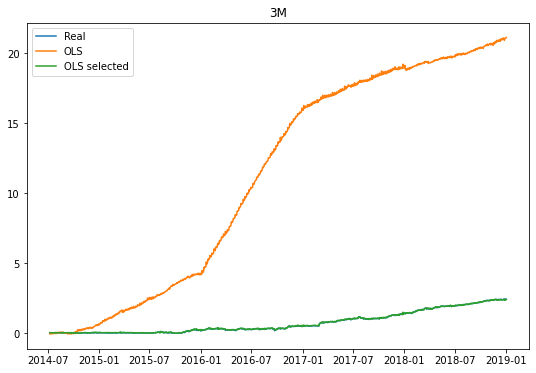

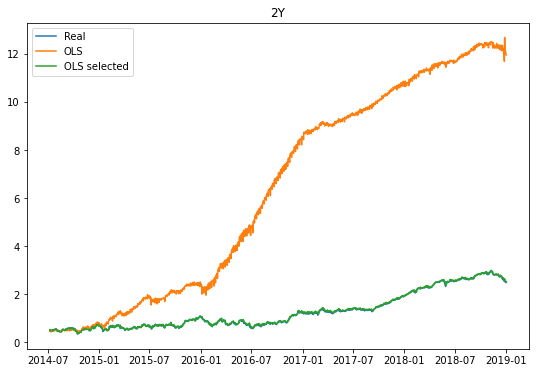

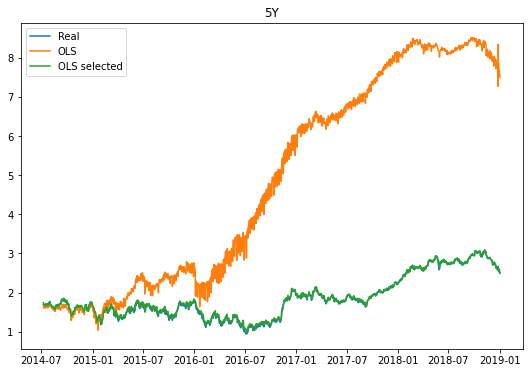

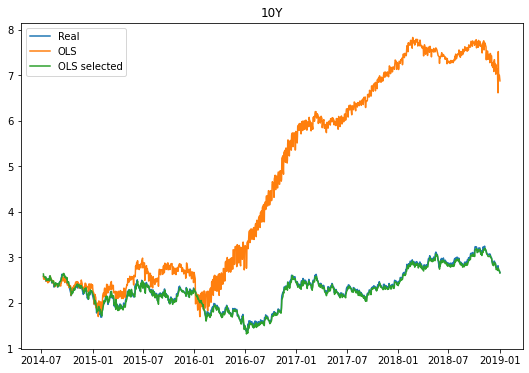

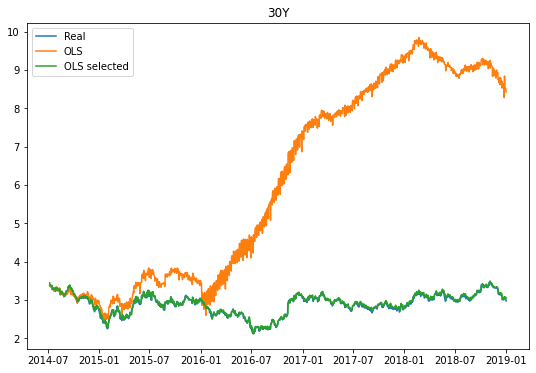

In [ ]:
i=0
for target in Y_name:
  fig= plt.figure(figsize=[9,6])
  plt.plot(X_test0.index,Y_testT[i],label='Real')
  plt.plot(X_test0.index,y_predict_ols[target],label='OLS')
  plt.plot(X_test0.index,y_predict_ols1[target],label='OLS selected')
  plt.title(target)
  plt.legend()
  plt.show()
  i+=1

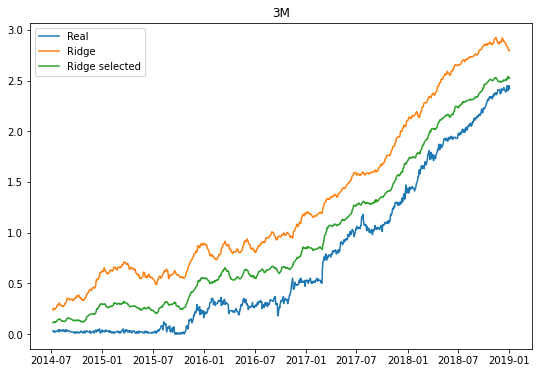

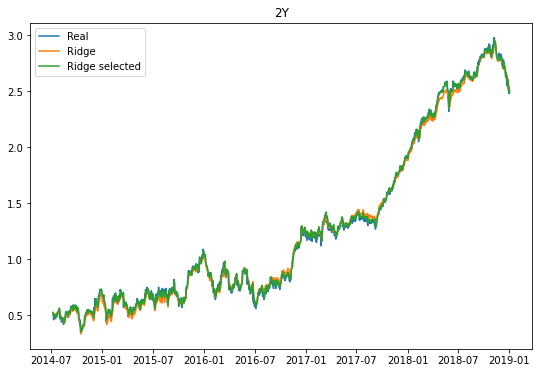

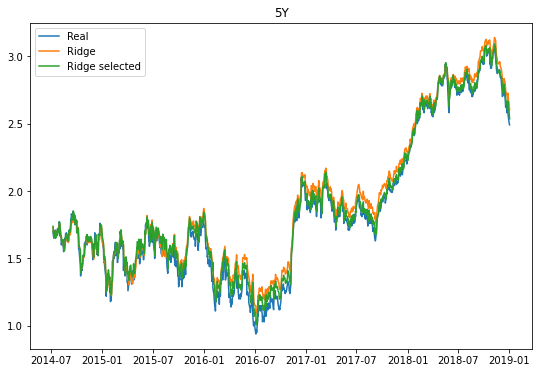

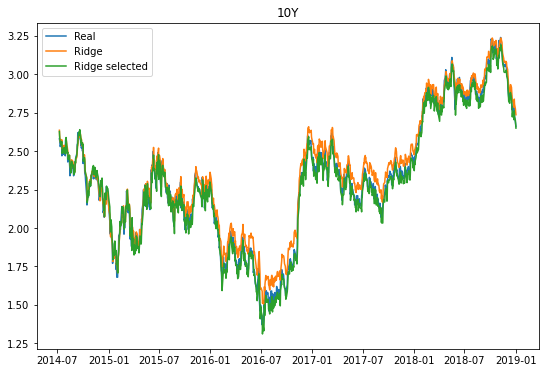

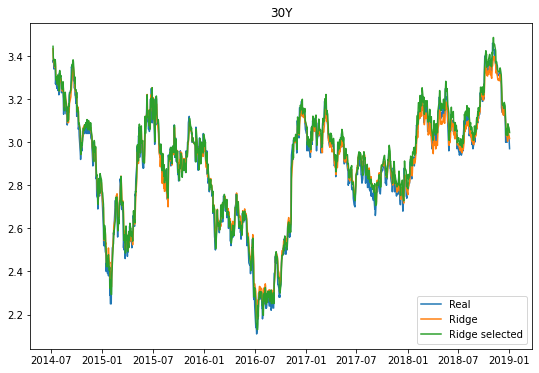

In [ ]:
i=0
for target in Y_name:
  fig= plt.figure(figsize=[9,6])
  plt.plot(X_test0.index,Y_testT[i],label='Real')
  plt.plot(X_test0.index,y_predict_ridge[target],label='Ridge')
  plt.plot(X_test0.index,y_predict_ridge1[target],label='Ridge selected')
  plt.title(target)
  plt.legend()
  plt.show()
  i+=1

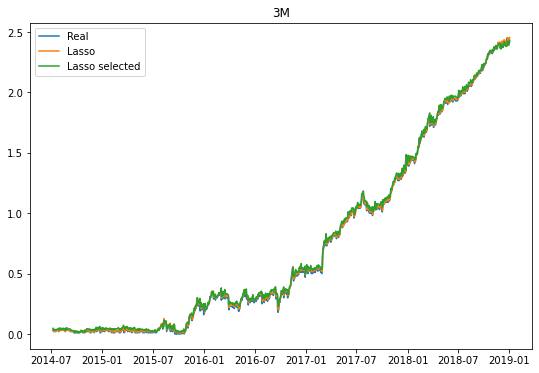

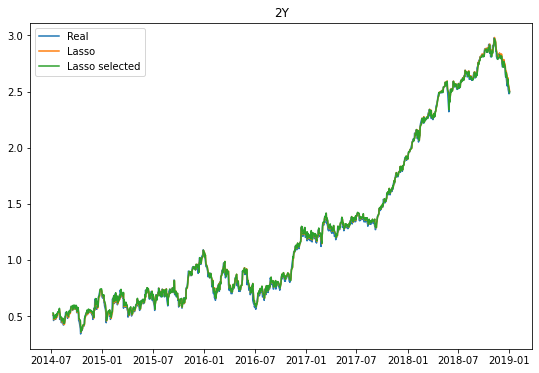

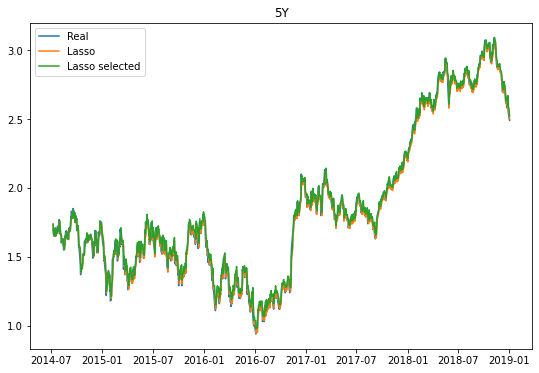

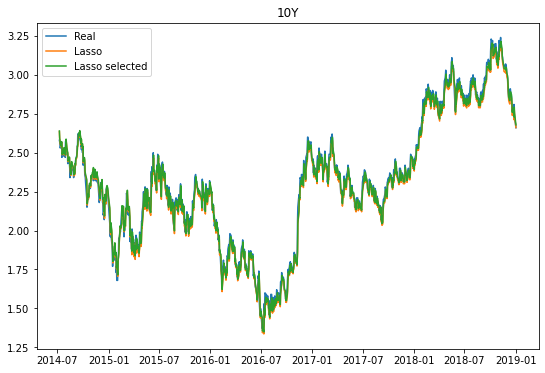

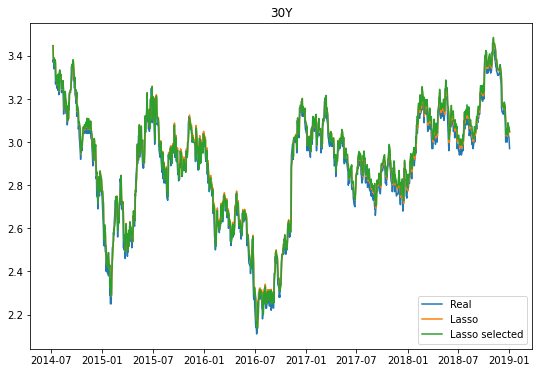

In [ ]:
i=0
for target in Y_name:
  fig= plt.figure(figsize=[9,6])
  plt.plot(X_test0.index,Y_testT[i],label='Real')
  plt.plot(X_test0.index,y_predict_lasso[target],label='Lasso')
  plt.plot(X_test0.index,y_predict_lasso1[target],label='Lasso selected')
  plt.title(target)
  plt.legend()
  plt.show()
  i+=1

In [ ]:
mse_ols=pload('mse_ols')
mse_ols

{'10Y': 9.162832080059742,
 '2Y': 39.02990053490515,
 '30Y': 16.304229331901947,
 '3M': 160.5092918775281,
 '5Y': 13.917118012365478}

In [ ]:
mse_ols1=pload('mse_ols1')
mse_ols1

{'10Y': 0.002735785201185165,
 '2Y': 0.0012218192687407491,
 '30Y': 0.002278823653787578,
 '3M': 0.0007109964124008509,
 '5Y': 0.0023416712832339762}

In [ ]:
mse_lasso=pload('mse_lasso')
mse_lasso

{'10Y': 0.00258068356176075,
 '2Y': 0.0009597082121994209,
 '30Y': 0.002270013016495608,
 '3M': 0.00042505771050153993,
 '5Y': 0.0018060534497474057}

In [ ]:
mse_lasso1=pload('mse_lasso1')
mse_lasso1

{'10Y': 0.0020952998743272106,
 '2Y': 0.0009783451423182204,
 '30Y': 0.002433084371975197,
 '3M': 0.0007636925739706884,
 '5Y': 0.002059687407558677}

In [ ]:
mse_ridge1=pload('mse_ridge1')
mse_ridge1

{'10Y': 0.0027121395093407026,
 '2Y': 0.000986212045771618,
 '30Y': 0.0023807515131856983,
 '3M': 0.000707661871189908,
 '5Y': 0.0033237610203890183}

In [ ]:
mse_ridge=pload('mse_ridge')
mse_ridge

{'10Y': 0.0058285116297086305,
 '2Y': 0.0017580802892118036,
 '30Y': 0.00228174334976581,
 '3M': 0.33165868524373165,
 '5Y': 0.008180019019296521}